## ADM1F_SRT: Ph control method 

The `ph control` method was developed by Wenjuan Zhang and uses Data Consistent Inversion Method.

Authors: Wenjuan Zhang and Elchin Jafarov

In [1]:
import os
import adm1f_utils as adm1fu
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

###  1. Relation between cation and PH

Here we explore the cation/ph relationships using diffrerent configurations. Note, based in the results will be different based on the ADM1F code version (i.e. original or SRT).  

In [2]:
# navigate to simulations folder
os.chdir('../simulations')

In [3]:
# Configuration of the one-phase reactor
config_default = {'Vliq':3400, 't_resx':0, 'Q':134}
config1 = {'Vliq':340, 't_resx':1.5, 'Q':618}
config2 = {'Vliq':3400, 't_resx':700, 'Q':618}

**Configurations**

| Configuration |  Vliq (m$^3$) | t\_resx (d) | Q (m$^3$/d)|  
| ------ | ------ | ------ | ------|
Default | 3400 | 0 | 134 |
Phase 1 | 340 | 1.5 | 618 |
Phase 2 | 3400 | 700 | 618/--- |

where t\_resx = SRT - HRT

In [4]:
# check if file exsits read from file
# otherwise run the simulations with different cations `cat_test`
cat_test = [i*0.001 for i in range(200)]

filename='data/no-configuration.dat'
if adm1fu.check_filename(filename):
    ph_test = np.loadtxt(filename)
else:
    ph_test = [adm1fu.ph(i,verbose='off',**config_default)[0] for i in cat_test]
    np.savetxt(filename, ph_test, fmt='%5.6f')

**Relation b/t cation and Ph under Default config**

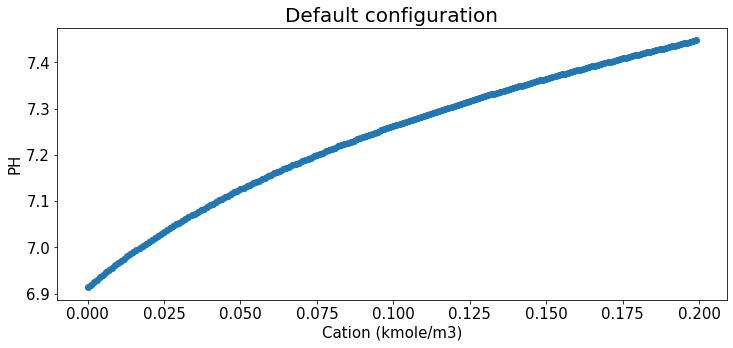

In [5]:
# Relation b/t cation and Ph under Default config
plt.figure(figsize=(12,5))
plt.scatter(cat_test, ph_test)
plt.ylabel('PH',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Cation (kmole/m3)',fontsize=15)
plt.title("Default configuration",fontsize=20);

**Relation b/t cation and Ph under Phase 1 config**

In [6]:
filename='data/configuration1.dat'
if adm1fu.check_filename(filename):
    ph_test_config1 = np.loadtxt(filename)
else:
    ph_test_config1 = [adm1fu.ph(i, verbose='off', **config1)[0] for i in cat_test]
    np.savetxt(filename, ph_test_config1, fmt='%5.6f')

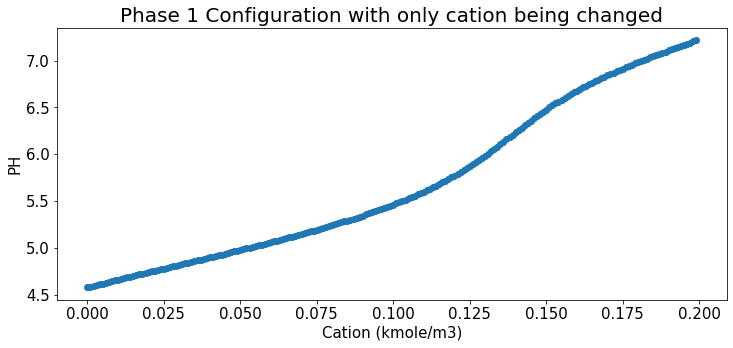

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(cat_test, ph_test_config1)
plt.ylabel('PH',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Cation (kmole/m3)',fontsize=15)
plt.title("Phase 1 Configuration with only cation being changed",fontsize=20);

**Relation b/t cation and Ph under Phase 2 config**

In [8]:
filename='data/configuration2.dat'
if adm1fu.check_filename(filename):
    ph_test_config2 = np.loadtxt(filename)
else:
    ph_test_config2 = [adm1fu.ph(i, verbose='off', **config2)[0] for i in cat_test]
    np.savetxt(filename, ph_test_config2, fmt='%5.6f')

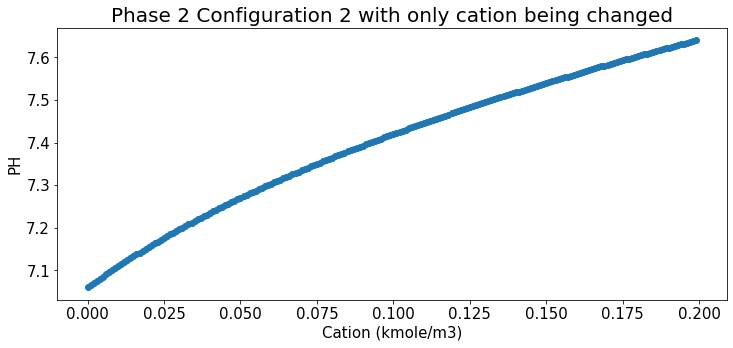

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(cat_test, ph_test_config2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('PH',fontsize=15)
plt.xlabel('Cation (kmole/m3)',fontsize=15)
plt.title("Phase 2 Configuration 2 with only cation being changed",fontsize=20);

### 2. PH: one-phase reactor

In [10]:
old_ph0 = adm1fu.ph(0)
print('Predicted PH is {} if using the original cation value {}'.format(old_ph0[0], old_ph0[1]))

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat
Predicted PH is 6.91367 if using the original cation value 0


In [11]:
old_ph1 = adm1fu.ph(0, **config1)      
print('Predicted PH is {} if using the original cation value {}'.format(old_ph1[0], old_ph1[1]))

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat -Vliq 340 -t_resx 1.5
Predicted PH is 4.57781 if using the original cation value 0


In [12]:
old_ph2 = adm1fu.ph(0, **config2)      
print('Predicted PH is {} if using the original cation value {}'.format(old_ph2[0], old_ph2[1]))

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat -Vliq 3400 -t_resx 700
Predicted PH is 7.05983 if using the original cation value 0


**Set Target:** Let's calculate the amount of cation needed by the one-phase reactor to match required `ph` targets using Data Consistent Inversion method.

In [13]:
class target:
    def __init__(self,ph,sig):
        self.ph = ph
        self.sig = sig
    def pdf(self,x):
        return norm.pdf(x,self.ph,self.sig)

In [14]:
# Give the necessary information
# target_ph = 6.5       # target_ph: target PH value, target_sig: allow some variations around target PH
target_sig = 0.01     # The smaller this value is, the more accurate we will get in the end
sample_size = 100

infl_path = 'influent.dat'
params_path = 'params.dat'
ic_path = 'ic.dat'

## Use data consistent inversion method to return the needed cation to get the target PH
init_sample = np.random.uniform(0,0.2,sample_size)   #the more samples we generate, the more accurate we will get in the end

In [15]:
target72 = target(7.2,target_sig)
target73 = target(7.3,target_sig)
target75 = target(7.5,target_sig)

**Target 1: target_ph=7.2 with Default configuration**

In [16]:
## ph_control accepts target, initial sample, number of cation values and file path of each input file
## ph_control return the needed cation to get the target PH
cat_tar72_dc = adm1fu.ph_control(target72,init_sample,1,infl_path,params_path,ic_path,verbose='off', **config_default)

# Print out the Needed Cation value!!
print('The amount of cation in the reactor should be:', cat_tar72_dc[0], 'kmole/m3')

Predicted PH is 6.91367
The amount of cation in the reactor should be: 0.07135066533871785 kmole/m3


In [17]:
[adm1fu.ph(i, **config_default) for i in cat_tar72_dc]

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat -Vliq 3400 -t_resx 0


[(7.18975, 0.07135066533871785)]

**Target 2: target_ph=7.2 with configuration 1**

In [18]:
## ph_control accepts target, initial sample, number of cation values and file path of each input file
## pph_control return the needed cation to get the target PH
cat_tar72_c1 = adm1fu.ph_control(target72,init_sample,1,infl_path,params_path,ic_path,verbose='off', **config1)

# Print out the Needed Cation value!!
print('The amount of cation in the reactor should be:', cat_tar72_c1[0], 'kmole/m3')

Predicted PH is 4.57781
The amount of cation in the reactor should be: 0.19737738732010346 kmole/m3


In [19]:
[adm1fu.ph(i, **config1) for i in cat_tar72_c1]

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat -Vliq 340 -t_resx 1.5


[(7.19608, 0.19737738732010346)]

**Target 3: target_ph=7.2 with configuration 2**

In [20]:
## ph_control accepts target, initial sample, number of cation values and file path of each input file
## ph_control return the needed cation to get the target PH
cat_tar72_c2 = adm1fu.ph_control(target72,init_sample,1,infl_path,params_path,ic_path,verbose='off', **config2)

# Print out the Needed Cation value!!
print('The amount of cation in the reactor should be:', cat_tar72_c2[0], 'kmole/m3')

Predicted PH is 7.05983
The amount of cation in the reactor should be: 0.031198904067240532 kmole/m3


In [21]:
[adm1fu.ph(i, **config2) for i in cat_tar72_c2]

Reactor run, ph phase-one:
$ADM1F_EXE -steady -influent_file influent_cur.dat -Vliq 3400 -t_resx 700


[(7.20101, 0.031198904067240532)]

### 3. PH: two-phase reactor

**PH control for both phase 1 and phase 2**

reactor_cat(target_1=target1, target_2=target2, Q1=1, Vliq1=1, t_resx1=1, Q2=1, Vliq2=1, t_res2=1)

**PH control for just phase 1 in two-phase reactor**

reactor_cat(target_1=target1, Q1=1, Vliq1=1, t_resx1=1, Q2=1, Vliq2=1, t_res2=1)

In [22]:
## Configuration of two-phase reacotr
# config12 = {"Vliq1":340, "Vliq2":3400, "t_resx1":1.5, "t_resx2":700, "Q1":618, "Q2":618}
config12 = {"Vliq1":340, "Vliq2":3400, "t_resx1":1.5, "t_resx2":700, "Q1":618}

**target_ph1=7.5, target_ph2=7.2 with default configuration12**

In [23]:
config12 = {"Vliq1":340, "Vliq2":3400, "t_resx1":1.5, "t_resx2":700, "Q1":618}
adm1fu.reactor2_cat(init_sample,target_1=target75,target_2=target72,verbose='off',**config12) 

verbose: off
Predicted PH is 4.57781
$ADM1F_EXE -steady -Vliq 340 -t_resx 1.5 -influent_file influent_cur.dat
Phase 1, after changing cation to 0.197377 kmole/m3, new PH = 7.19608
Predicted PH is 7.10724

$ADM1F_EXE -steady -Vliq 3400 -t_resx 700 -influent_file influent_cur.dat
Phase 2, after changing cation to 0.017699 kmole/m3, new PH = 7.18887


**target_ph1=7.5, target_ph2=None with default configuration12**

In [24]:
adm1fu.reactor2_cat(init_sample,target_1=target75,verbose='off',**config12)

verbose: off
Predicted PH is 4.57781
$ADM1F_EXE -steady -Vliq 340 -t_resx 1.5 -influent_file influent_cur.dat
Phase 1, after changing cation to 0.197377 kmole/m3, new PH = 7.19608

$ADM1F_EXE -steady -Vliq 3400 -t_resx 700 -influent_file influent_cur.dat
Phase 2, without changing cation, predicted PH = 7.65471
